# OK Cupid Date a Scientist

In this project data from OK Cupid dating app will be analysed using machine learning models.

To start, even before defining the goals it's necessary to load and inspect the data, see how many columns there are and what each one represents, see the length of the data and find out the main missing values.
After all of that it's done, we can now define our goals.

Firstly let's load the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect the Data

Using the pandas library we will import the file "profiles.csv", which is the file that all of our data is on.
First we'll create a DataFrame named "profiles", then the first five rows will be inspected and the name of the columns obtained.

After loading and giving a first inspection to the data some things can be said:
* the data is composed by 31 diferent columns;
* 10 of those columns are essays, wich mean that we will have to ignore them in our data analysis;
* the rest of them are about the lifestyles, education, etc. Meaning that they are important to the data analysis;
* the data is composed by 59946 rows, and because each row is a user, it means that there is information about 59946 users.

In [2]:
profiles = pd.read_csv("profiles.csv")

print(profiles.head())
print(profiles.columns)
print(len(profiles))

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

## Create Summary Statistics

Now that the data as been somewhat explored it's time to get rid of the data that can not be easily explored (the essays) and create visualizations from the other columns.
Then let's figure out what are the columns with the most missing values and plot them in an bar plot.

Text(0.5, 1.0, 'Missing Values')

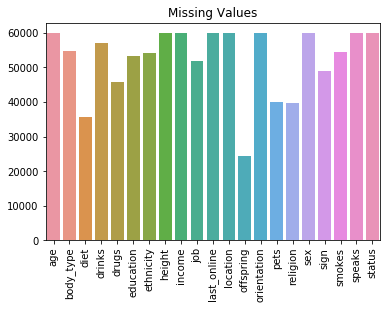

In [3]:
useful_columns = ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
                  'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
                  'speaks', 'status']
profiles_clean = profiles[useful_columns]
missing = pd.DataFrame()

for column in useful_columns:
    missing[column] = profiles_clean[column].isna().value_counts()
    
sns.barplot(data = missing)
plt.xticks(rotation = 90)
plt.title("Missing Values")

#### More data exploration

There are 10 columns with no missing values, so first lets see which of them are numeric values.
From the 10 columns 3 are of numeric type, wich makes sense.

In [4]:
full_columns = ["age", "height", "income", "last_online", "location", "orientation", "sex", "speaks", "status"]
full = profiles_clean[full_columns]
print(full.dtypes)

age              int64
height         float64
income           int64
last_online     object
location        object
orientation     object
sex             object
speaks          object
status          object
dtype: object


##### Exploring numeric columns
Now let's explore the distribution of two columns, the age and the income.

###### Age
For the age column whe are interested in knowing the average and median age. We will also create some plots to see the distribution of the data.
From the histogram it's possible to see that the age distribution is right skewed, being that the average and the median values make sense.
From the boxplot it's clear to see some outliers.

The average age is of 32.3402895939679 years.
The median age is of 30.0 years.
The oldest person is 110 years old.
The youngest person is 18 years old.
The age range is of 92 years.


Text(0, 0.5, 'Amount')

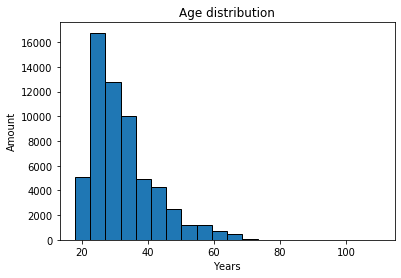

In [5]:
print("The average age is of {0} years.".format(np.mean(full["age"])))
print("The median age is of {0} years.".format(np.median(full["age"])))

oldest = np.max(full["age"])
youngest = np.min(full["age"])
age_range = oldest - youngest
print("The oldest person is {0} years old.".format(oldest))
print("The youngest person is {0} years old.".format(youngest))
print("The age range is of {0} years.".format(age_range))

plt.hist(full["age"], bins = 20, edgecolor = "black")
plt.title("Age distribution")
plt.xlabel("Years")
plt.ylabel("Amount")

Text(0.5, 1.0, 'Age boxplot')

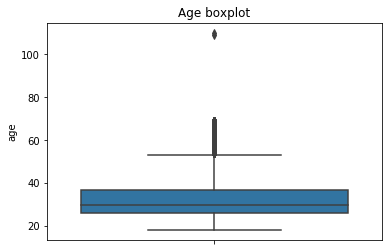

In [6]:
sns.boxplot(data = full, y = "age")
plt.title("Age boxplot")

###### Income
Now let's explore the income of the users.
From the results produced below it's clear to see that althoug the income column has no missing values, is due to the fact that whenever ther was no income, it was attributed a value of -1, and being the number of users with that value so high we will not continue the analysis in this variable.

In [7]:
print("The average income is of {0}.".format(np.mean(full["income"])))
print("The median income is of {0}.".format(np.median(full["income"])))

max_in = np.max(full["income"])
min_in = np.min(full["income"])
income_range = max_in - min_in
print("The maximum income is of {0}.".format(max_in))
print("The maximum income is of {0}.".format(min_in))
print("The income range is of {0}.".format(income_range))

print(full["income"].value_counts())

The average income is of 20033.222533613585.
The median income is of -1.0.
The maximum income is of 1000000.
The maximum income is of -1.
The income range is of 1000001.
-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64


##### More variables
Now let's explore some other variables.
The variables that are interesting to explore are:
* `orientation`
* `sex`

###### Orientation and Sex
First let's see the values available for both variables, next we'll do some summary statistics and to end we'll see if there is any correlation between the two.

There are three categories for the `orientation` variable:
* straight
* gay
* bisexual

And two categories for the `sex` variable, making it a binary variable:
* male
* female

In a first visual analysis it's possible to say that the majority of users are straight and there are more mens in the dataset.

With the last rwo bar plots it's clear to see that the straight orientation is dominant in both sexes.

In [8]:
print("Orientation values:")
print(full["orientation"].value_counts())
print("\nSex values:")
print(full["sex"].value_counts())

Orientation values:
straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

Sex values:
m    35829
f    24117
Name: sex, dtype: int64


Text(0.5, 1.0, 'Orientation Count')

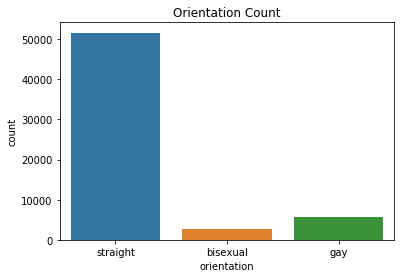

In [9]:
sns.countplot(full["orientation"])
plt.title("Orientation Count")

Text(0.5, 1.0, 'Sex Count')

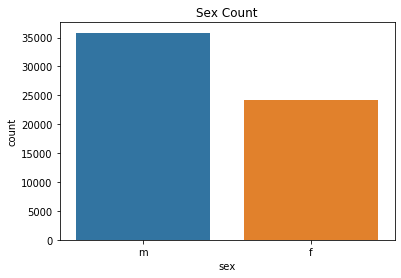

In [10]:
sns.countplot(full["sex"])
plt.title("Sex Count")

Text(0.5, 1.0, 'Male Orientation Count')

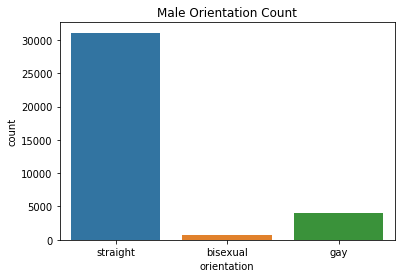

In [11]:
male_orientation = full["orientation"][full["sex"] == "m"]
female_orientation = full["orientation"][full["sex"] == "f"]

sns.countplot(male_orientation)
plt.title("Male Orientation Count")

Text(0.5, 1.0, 'Female Orientation Count')

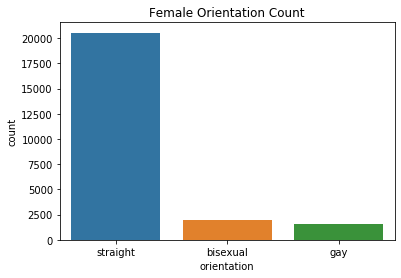

In [12]:
sns.countplot(female_orientation)
plt.title("Female Orientation Count")

###### Orientation table of proportions
It is interesting to see the proportion of the orientations i both sexes, and to visualize that a table of proportions it's the best option.

In [13]:
or_freq_tab = pd.crosstab(full["sex"], full["orientation"])
or_prop_tab = or_freq_tab / len(full)
print(or_prop_tab)

orientation  bisexual       gay  straight
sex                                      
f            0.033297  0.026491  0.342525
m            0.012862  0.066476  0.518350


## Preprocessing data
Now that we an analysis of the main factors of the population it's time to create a machine learning model to predict the signs mmissing in the data. But beforecreating a model it is important to preprocess the data.
The columns chosen for the building of the model are:
* `diet`
* `orientation`
* `drinks`
* `offspring`
* `smokes`
* `status`
* `sign`

Our goal is to predict the sign of the users, so we will create two dataframes that has only the rows with the sign values and one with the rows with missing sign values, in order to predict the missing values.

We will go one by one and fill or drop the missing values, and turning them into numeric variables able to be analysed.

In [14]:
prediction_columns = ["diet", "orientation", "drinks", "offspring", "smokes", "status", "sign"]
profiles_sign = profiles_clean.dropna(subset = ["sign"])
profiles_sign = profiles_sign[prediction_columns]
profiles_no_sign = profiles_clean[profiles_clean["sign"].isna()]
profiles_no_sign = profiles_no_sign[prediction_columns]
profiles_no_sign = profiles_no_sign.drop(["sign"], axis = 1)

def column_values(data, column_list):
    for column in column_list:
        print(column + " values:")
        print(data[column].unique())

column_values(profiles_sign, prediction_columns)

diet values:
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
orientation values:
['straight' 'bisexual' 'gay']
drinks values:
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
offspring values:
['doesn&rsquo;t have kids, but might want them' nan
 'doesn&rsquo;t want kids' 'doesn&rsquo;t have kids, but wants them'
 'doesn&rsquo;t have kids' 'wants kids' 'has a kid' 'has kids'
 'doesn&rsquo;t have kids, and doesn&rsquo;t want any'
 'has kids, but doesn&rsquo;t want more'
 'has a kid, but doesn&rsquo;t want more' 'has a kid, and wants more'
 'has kids, and might want more' 'might want kids'
 'has a kid, and might want more' 'has kids, and wants more']
smokes values:
['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']
status values

In [15]:
profiles_sign = profiles_sign.fillna(value = {"diet": "anything", "drinks": "no", "offspring": "no", "smokes": "no"})

def category_values(data, column, ordered_list):
    data[column] = pd.Categorical(data[column], ordered_list, ordered = True)
    data[column] = data[column].cat.codes
    
profiles_sign = profiles_sign.replace({"diet": {'strictly anything': "anything", 'mostly other': "anything",
                                               'mostly anything': "anything", 'strictly other': "anything", 'other': "anything",
                                               'mostly vegetarian': 'vegetarian', 'strictly vegetarian': 'vegetarian',
                                               'strictly vegan': 'vegan', 'mostly vegan': 'vegan', 'mostly halal': 'halal',
                                               'strictly halal': 'halal', 'mostly kosher': 'kosher',
                                               'strictly kosher': 'kosher'},
                                       "drinks": {'socially': "yes", 'often': "yes", 'rarely': "yes", 'very often': "yes",
                                                 'desperately': "yes", 'not at all': "no"},
                                       "offspring": {'doesn&rsquo;t have kids, but might want them': "no",
                                                     'doesn&rsquo;t want kids': "no", 'might want kids': "no",
                                                     'doesn&rsquo;t have kids, but wants them': "no",
                                                     'doesn&rsquo;t have kids': "no", 'wants kids': "no",                                                     
                                                     'doesn&rsquo;t have kids, and doesn&rsquo;t want any': "no",
                                                     'has a kid': "yes", 'has kids': "yes",
                                                     'has kids, but doesn&rsquo;t want more': "yes",
                                                     'has a kid, but doesn&rsquo;t want more': "yes",
                                                     'has a kid, and wants more': "yes", 'has kids, and might want more': "yes",
                                                     'has a kid, and might want more': "yes",
                                                     'has kids, and wants more': "yes"},
                                       "smokes": {'sometimes': 'yes', 'when drinking': 'yes', 'trying to quit': 'yes'},
                                       "sign": {'gemini but it doesn&rsquo;t matter': 'gemini',
                                                'gemini and it matters a lot': 'gemini',
                                                'gemini and it&rsquo;s fun to think about': 'gemini',
                                                'cancer but it doesn&rsquo;t matter': 'cancer',
                                                'cancer and it&rsquo;s fun to think about': 'cancer',
                                                'cancer and it matters a lot': 'cancer',                                                
                                                'pisces but it doesn&rsquo;t matter': 'pisces',
                                                'pisces and it&rsquo;s fun to think about': 'pisces',
                                                'pisces and it matters a lot': 'pisces',
                                                'aquarius but it doesn&rsquo;t matter': 'aquarius',
                                                'aquarius and it&rsquo;s fun to think about': 'aquarius',
                                                'aquarius and it matters a lot': 'aquarius',                                                
                                                'taurus but it doesn&rsquo;t matter': 'taurus',
                                                'taurus and it&rsquo;s fun to think about': 'taurus',
                                                'taurus and it matters a lot': 'taurus',                                                
                                                'virgo but it doesn&rsquo;t matter': 'virgo',
                                                'virgo and it&rsquo;s fun to think about': 'virgo',
                                                'virgo and it matters a lot': 'virgo',                                                
                                                'sagittarius but it doesn&rsquo;t matter': 'sagittarius',
                                                'sagittarius and it&rsquo;s fun to think about': 'sagittarius',
                                                'sagittarius and it matters a lot': 'sagittarius',
                                                'leo but it doesn&rsquo;t matter': 'leo',
                                                'leo and it&rsquo;s fun to think about': 'leo', 'leo and it matters a lot': 'leo',
                                                'aries and it&rsquo;s fun to think about': 'aries',
                                                'aries but it doesn&rsquo;t matter': 'aries',
                                                'aries and it matters a lot': 'aries',
                                                'libra but it doesn&rsquo;t matter': 'libra',
                                                'libra and it&rsquo;s fun to think about': 'libra',
                                                'libra and it matters a lot': 'libra',
                                                'scorpio and it matters a lot': 'scorpio',
                                                'scorpio and it&rsquo;s fun to think about': 'scorpio',
                                                'scorpio but it doesn&rsquo;t matter': 'scorpio',
                                                'capricorn but it doesn&rsquo;t matter': 'capricorn',
                                                'capricorn and it&rsquo;s fun to think about': 'capricorn',
                                                'capricorn and it matters a lot': 'capricorn'}})

for column in prediction_columns:
    category_values(profiles_sign, column, profiles_sign[column].unique())
    
print(profiles_sign.head())

   diet  orientation  drinks  offspring  smokes  status  sign
0     0            0       0          0       0       0     0
1     0            0       0          0       1       0     1
2     0            0       0          0       1       1     2
3     1            0       0          0       1       0     2
4     0            0       0          0       1       0     3


In [16]:
no_sign_columns = ["diet", "orientation", "drinks", "offspring", "smokes", "status"]
column_values(profiles_no_sign, no_sign_columns)

diet values:
['mostly anything' nan 'anything' 'strictly anything' 'mostly vegetarian'
 'vegetarian' 'strictly vegetarian' 'mostly kosher' 'mostly vegan'
 'mostly other' 'strictly halal' 'vegan' 'other' 'strictly other'
 'mostly halal' 'strictly vegan' 'halal' 'strictly kosher' 'kosher']
orientation values:
['straight' 'bisexual' 'gay']
drinks values:
['socially' nan 'often' 'rarely' 'not at all' 'desperately' 'very often']
offspring values:
[nan 'doesn&rsquo;t have kids, but wants them' 'doesn&rsquo;t have kids'
 'doesn&rsquo;t want kids' 'doesn&rsquo;t have kids, but might want them'
 'has kids' 'has a kid'
 'doesn&rsquo;t have kids, and doesn&rsquo;t want any'
 'has kids, but doesn&rsquo;t want more'
 'has a kid, but doesn&rsquo;t want more' 'has a kid, and might want more'
 'wants kids' 'has a kid, and wants more' 'has kids, and might want more'
 'might want kids']
smokes values:
['no' nan 'when drinking' 'sometimes' 'yes' 'trying to quit']
status values:
['single' 'available' 'see

In [17]:
profiles_no_sign = profiles_no_sign.fillna(value = {"diet": "anything", "drinks": "no", "offspring": "no", "smokes": "no"})
    
profiles_no_sign = profiles_no_sign.replace({"diet": {'strictly anything': "anything", 'mostly other': "anything",
                                               'mostly anything': "anything", 'strictly other': "anything", 'other': "anything",
                                               'mostly vegetarian': 'vegetarian', 'strictly vegetarian': 'vegetarian',
                                               'strictly vegan': 'vegan', 'mostly vegan': 'vegan', 'mostly halal': 'halal',
                                               'strictly halal': 'halal', 'mostly kosher': 'kosher',
                                               'strictly kosher': 'kosher'},
                                       "drinks": {'socially': "yes", 'often': "yes", 'rarely': "yes", 'very often': "yes",
                                                 'desperately': "yes", 'not at all': "no"},
                                       "offspring": {'doesn&rsquo;t have kids, but might want them': "no",
                                                     'doesn&rsquo;t want kids': "no", 'might want kids': "no",
                                                     'doesn&rsquo;t have kids, but wants them': "no",
                                                     'doesn&rsquo;t have kids': "no", 'wants kids': "no",                                                     
                                                     'doesn&rsquo;t have kids, and doesn&rsquo;t want any': "no",
                                                     'has a kid': "yes", 'has kids': "yes",
                                                     'has kids, but doesn&rsquo;t want more': "yes",
                                                     'has a kid, but doesn&rsquo;t want more': "yes",
                                                     'has a kid, and wants more': "yes", 'has kids, and might want more': "yes",
                                                     'has a kid, and might want more': "yes",
                                                     'has kids, and wants more': "yes"},
                                       "smokes": {'sometimes': 'yes', 'when drinking': 'yes', 'trying to quit': 'yes'}})

for column in no_sign_columns:
    category_values(profiles_no_sign, column, profiles_no_sign[column].unique())
    
print(profiles_no_sign.head())

    diet  orientation  drinks  offspring  smokes  status
13     0            0       0          0       0       0
28     0            0       0          0       0       0
31     0            0       0          0       0       0
35     0            0       1          0       0       0
39     0            0       0          0       0       0


## Choosing and building the model

We are trying to predict the missing sing, and there are twelve of them, wich means that there are twelve possible categories.

After analysing the knowned algorithms I chosed the K_Nearest Neighbors Classifier.

Text(0, 0.5, 'Accuracy')

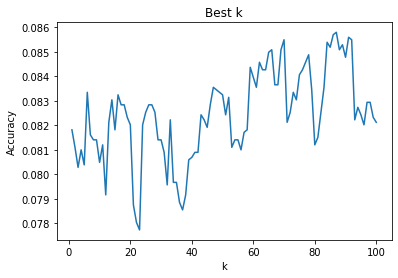

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

train_data, test_data, train_labels, test_labels = train_test_split(profiles_sign[no_sign_columns], profiles_sign["sign"], test_size = 0.2, random_state = 1)

#choosing best accury
accuracies = []
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    accuracies.append(classifier.score(test_data, test_labels))
    
#plotting the k's
plt.plot(list(range(1, 101)), accuracies)
plt.title("Best k")
plt.xlabel("k")
plt.ylabel("Accuracy")